## Part 2

### Question 1

In [1]:
conda install seaborn matplotlib scipy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\stefa\OneDrive\Career Foundry\11.20 Instacart Basket Analysis'

In [4]:
opc_merged_sample = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'opc_merged_sample.pkl'))

In [5]:
opc_merged_sample.rename (columns = {'Unnamed: 0_x' : 'unit_id'}, inplace = True)

In [6]:
opc_merged_sample.rename (columns = {'Unnamed: 0_y' : 'account_id'}, inplace = True)

In [7]:
pd.options.display.max_columns = None

In [8]:
opc_merged_sample.rename (columns = {'order_dow' : 'orders_day_of_week'}, inplace = True)

In [9]:
opc_merged_sample

,unit_id,product_id,product_name,aisle_id,department_id,prices,account_id,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,138,prior,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,,,Most orders,32,Regular customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1977647,138,prior,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,,,Average orders,32,Regular customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,907,Premium Sliced Bacon,106,12,20.0,1969,2254091,138,prior,10,5,14,6.0,1,1,both,NaN,Regularly busy,,,Most orders,32,Regular customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,1000,1000,Apricots,18,10,12.9,1968,505689,138,prior,9,6,12,7.0,5,0,both,Mid-range product,Regularly busy,,,Most orders,32,Regular customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,3265,3265,Mini Seedless Watermelon Pack,32,4,1.7,1976,960220,138,prior,17,5,14,19.0,1,0,both,Low-range product,Regularly busy,,,Most orders,32,Regular customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11759,11759,Organic Simply Naked Pita Chips,107,19,4.4,3097894,2621797,186821,prior,4,0,17,8.0,8,1,both,Low-range product,Busiest days,x,,Average orders,22,Regular customer,Norma,Chapman,Female,Delaware,64,8/6/2018,2,married,49862
99996,11759,11759,Organic Simply Naked Pita Chips,107,19,4.4,3097895,1727763,186821,prior,5,1,11,8.0,3,1,both,Low-range product,Busiest days,x,,Most orders,22,Regular customer,Norma,Chapman,Female,Delaware,64,8/6/2018,2,married,49862
99997,11759,11759,Organic Simply Naked Pita Chips,107,19,4.4,3097896,165200,186821,prior,6,6,6,26.0,4,1,both,Low-range product,Regularly busy,,,Fewest orders,22,Regular customer,Norma,Chapman,Female,Delaware,64,8/6/2018,2,married,49862
99998,11759,11759,Organic Simply Naked Pita Chips,107,19,4.4,3097898,590138,186821,prior,8,6,21,7.0,10,1,both,Low-range product,Regularly busy,,,Average orders,22,Regular customer,Norma,Chapman,Female,Delaware,64,8/6/2018,2,married,49862


### Question 2: Charts

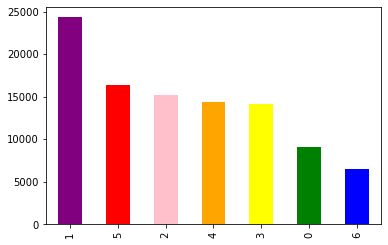

In [22]:
bar = opc_merged_sample['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

From the chat above, we can see that the most popular day of the week in this market is Monday (1) while the least is Sunday (6)

In [11]:
opc_merged_sample.loc[opc_merged_sample['prices'] >100, 'prices'] = np.nan

In [12]:
opc_merged_sample['prices'].max()

25.0

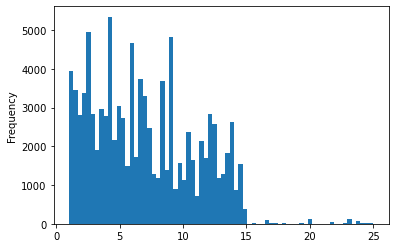

In [13]:
hist_2 = opc_merged_sample['prices'].plot.hist(bins = 70)

According to this market, the costs of goods tend to be $15 and less.

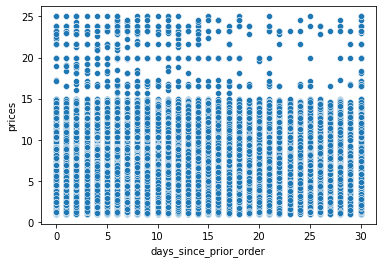

In [27]:
scat_1 = sns.scatterplot(x = 'days_since_prior_order', y = 'prices',data = opc_merged_sample)

According to scatterplot above, we can see a trend with the lower priced items being reordered more frequently.

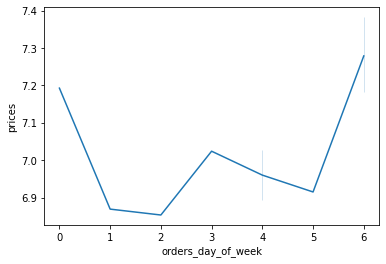

In [15]:
line = sns.lineplot(data = opc_merged_sample, x = 'orders_day_of_week',y = 'prices')

Interestingly, people tend to buy more expensive things on Mondays (1) and Sundays (6)

### Question 3: Histogram of orders per hour of day

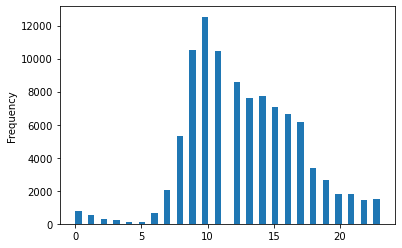

In [16]:
hist = opc_merged_sample['order_hour_of_day'].plot.hist(bins = 48)

Accordingly, the busiest hours for this market are 9:00-11:00am. It then levels down progressively after that.

### Question 4: Loyalty Flag Chart

<AxesSubplot:>

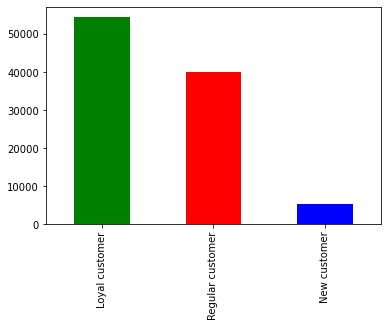

In [17]:
opc_merged_sample['loyalty_flag'].value_counts().plot.bar(color = ['green', 'red', 'blue'])

Seemingly, the greatest market comes from the loyalty customers. Thus, this business has good costumer fidelity.

### Question 5: Prices vs. Hours of Day Chart

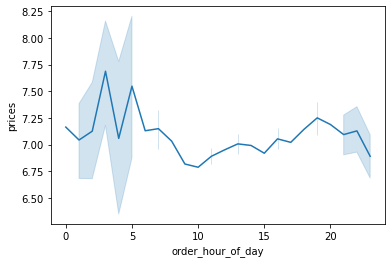

In [18]:
line2 = sns.lineplot(data = opc_merged_sample, x = 'order_hour_of_day',y = 'prices')

According to the chart above, the more expensive products seem to be sold in the morning and later on the night. However, there seems to be a higher volatility with products very early in the morning and very late in the evening

### Question 6: Age vs. Family Status Chart

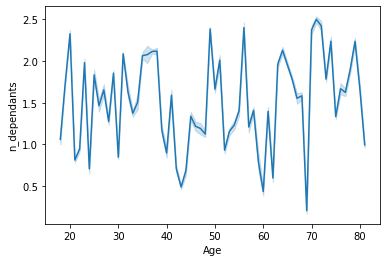

In [20]:
line3 = sns.lineplot(data = opc_merged_sample, x = 'Age',y = 'n_dependants')

The chart above does not seem to have a clear trend to show, thus, is inconclusive.

### Question 7: Age vs. Spending Power Chart

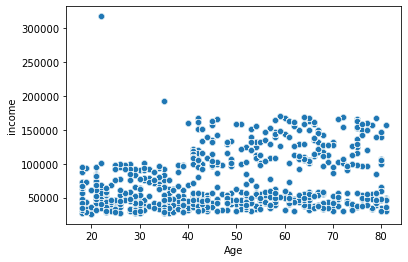

In [32]:
scat_2 = sns.scatterplot(x = 'Age', y = 'income',data = opc_merged_sample)

Interestingly, the chart shows that of the customers that utilize the application, those that are 40 and above have a greater spending power than those below. It would be wise to market products to these clients.

In [23]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sample_bar_orders_dow.png'))

In [25]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sample_hist_prices_frequency.png'))

In [28]:
scat_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sample_scat_prices_popularity.png'))

In [29]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sample_line_avgprices_dow.png'))

In [30]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sample_hist_busiest_dow.png'))

In [31]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sample_line_avgprices_dow.png'))

In [33]:
scat_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sample_scat_age_income.png'))

In [34]:
opc_merged_sample.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'opc_merged_sample_final.pkl'))